In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [80]:
train=pd.read_csv('D:\\Gandhi\\Machine Learning\\Datasets\\Bigmart_sales\\Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [81]:
train.shape

(8523, 12)

In [82]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [84]:
numerical=train.select_dtypes(['float64','int64']).columns
categorical=train.select_dtypes(['object']).columns

print('Numerical features are:',numerical)
print('Categorical features are:',categorical)

Numerical features are: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')
Categorical features are: Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [85]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [86]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [87]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [88]:
Item_Weight_cv=train['Item_Weight'].std()/train['Item_Weight'].mean()
Item_Visibility_cv=train['Item_Visibility'].std()/train['Item_Visibility'].mean()
Item_MRP_cv=train['Item_MRP'].std()/train['Item_MRP'].mean()
Outlet_Establishment_Year_cv=train['Outlet_Establishment_Year'].std()/train['Outlet_Establishment_Year'].mean()
Item_Outlet_Sales_cv=train['Item_Outlet_Sales'].std()/train['Item_Outlet_Sales'].mean()
                         
print('Co-efficient of varience of Item_Weight is',Item_Weight_cv)
print('Co-efficient of varience of Item_Visibility is',Item_Visibility_cv)
print('Co-efficient of varience of Item_MRP is',Item_MRP_cv)
print('Co-efficient of varience of Outlet_Establishment_Year is',Outlet_Establishment_Year_cv)
print('Co-efficient of varience of Item_Outlet_Sales is',Item_Outlet_Sales_cv)

Co-efficient of varience of Item_Weight is 0.36114361787767413
Co-efficient of varience of Item_Visibility is 0.7802243976757889
Co-efficient of varience of Item_MRP is 0.4416897492087891
Co-efficient of varience of Outlet_Establishment_Year is 0.004190422901735029
Co-efficient of varience of Item_Outlet_Sales is 0.7823354371415908


In [89]:
a=train['Item_Weight'].mean()
a

12.857645184136183

In [90]:
train['Item_Weight']=train['Item_Weight'].fillna(a)
train['Item_Weight'].isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


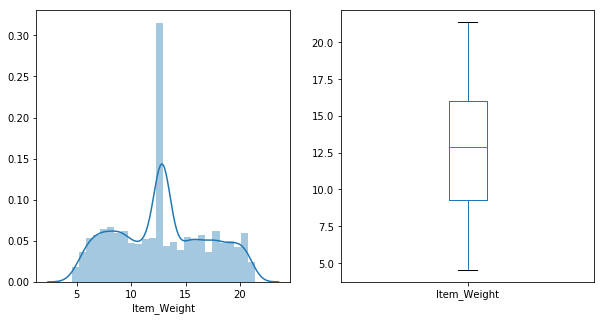

In [91]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['Item_Weight'])

plt.subplot(122)
train['Item_Weight'].plot.box(figsize=(10,5))

plt.show()

In [92]:
missing=(train['Item_Visibility']==0)
missing.sum()
     

526

In [93]:
vis_mean=train['Item_Visibility'].mean()
vis_mean

0.06613202877895127

In [94]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,vis_mean)
missing.sum()

526

In [95]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914
std,4.226124,0.048742,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


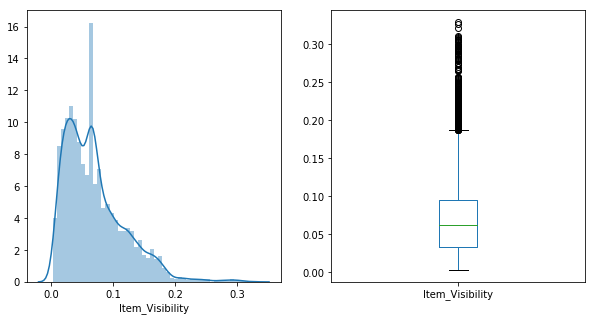

In [96]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['Item_Visibility'])

plt.subplot(122)
train['Item_Visibility'].plot.box(figsize=(10,5))

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


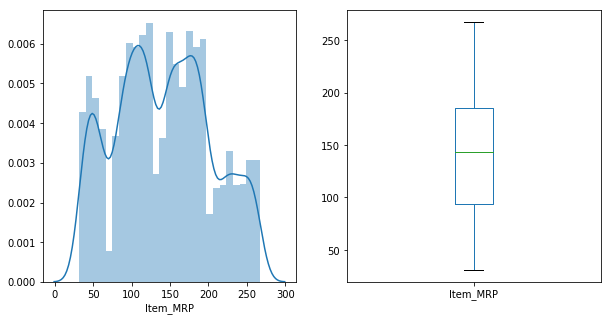

In [97]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['Item_MRP'])

plt.subplot(122)
train['Item_MRP'].plot.box(figsize=(10,5))

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


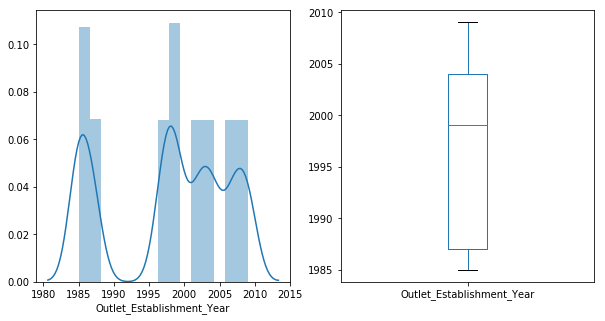

In [98]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['Outlet_Establishment_Year'])

plt.subplot(122)
train['Outlet_Establishment_Year'].plot.box(figsize=(10,5))

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


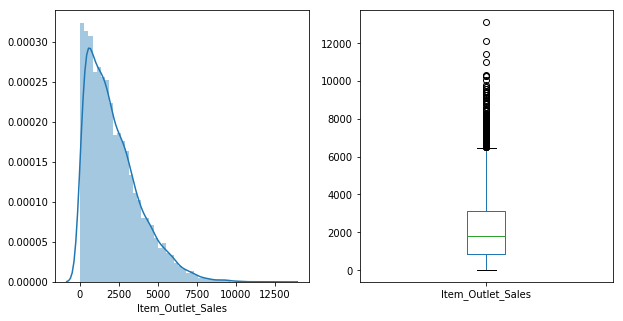

In [99]:
plt.figure(1)
plt.subplot(121)
sn.distplot(train['Item_Outlet_Sales'])

plt.subplot(122)
train['Item_Outlet_Sales'].plot.box(figsize=(10,5))

plt.show()

In [100]:
categorical

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [101]:
train['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDQ40     9
FDT07     9
FDG09     9
DRE49     9
FDW26     9
FDU12     9
DRN47     9
NCY18     9
FDX04     9
NCB18     9
FDW49     9
FDP25     9
FDV38     9
FDX20     9
FDO19     9
FDF56     9
NCF42     9
FDD38     9
NCI54     9
NCJ30     9
FDX31     9
FDV60     9
NCL31     9
FDF52     9
NCQ06     9
FDD05     8
NCQ05     8
NCC18     8
         ..
FDZ50     2
FDW10     2
NCG19     2
FDH22     2
FDR03     2
FDT33     2
NCV18     2
FDE39     2
NCM42     2
FDD22     2
FDI36     2
FDR57     2
FDM16     2
DRI59     2
DRC24     2
FDU43     2
NCW05     2
NCW30     2
FDB47     2
DRE01     2
FDE38     2
FDE52     1
FDO33     1
FDC23     1
FDT35     1
FDK57     1
FDN52     1
DRF48     1
FDQ60     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [102]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [103]:
for i in train.columns:
    if (train[i].dtype=='object'):
        print(train[i].value_counts())

FDG33    10
FDW13    10
FDQ40     9
FDT07     9
FDG09     9
DRE49     9
FDW26     9
FDU12     9
DRN47     9
NCY18     9
FDX04     9
NCB18     9
FDW49     9
FDP25     9
FDV38     9
FDX20     9
FDO19     9
FDF56     9
NCF42     9
FDD38     9
NCI54     9
NCJ30     9
FDX31     9
FDV60     9
NCL31     9
FDF52     9
NCQ06     9
FDD05     8
NCQ05     8
NCC18     8
         ..
FDZ50     2
FDW10     2
NCG19     2
FDH22     2
FDR03     2
FDT33     2
NCV18     2
FDE39     2
NCM42     2
FDD22     2
FDI36     2
FDR57     2
FDM16     2
DRI59     2
DRC24     2
FDU43     2
NCW05     2
NCW30     2
FDB47     2
DRE01     2
FDE38     2
FDE52     1
FDO33     1
FDC23     1
FDT35     1
FDK57     1
FDN52     1
DRF48     1
FDQ60     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Food

In [104]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print (train['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


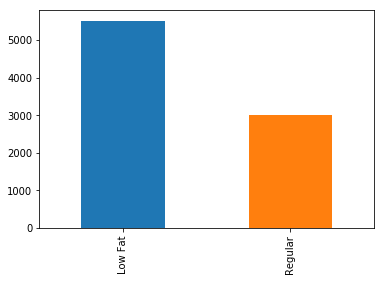

In [105]:
train['Item_Fat_Content'].value_counts().plot.bar()

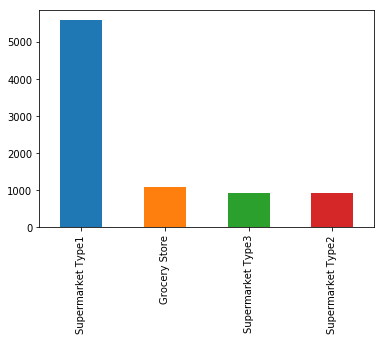

In [106]:
train['Outlet_Type'].value_counts().plot.bar()

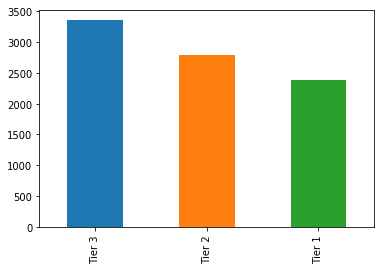

In [107]:
train['Outlet_Location_Type'].value_counts().plot.bar()

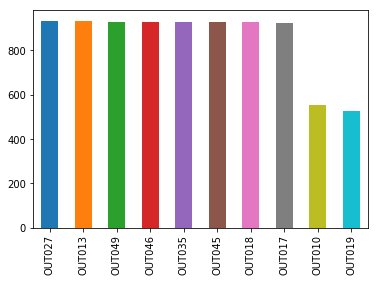

In [108]:
train['Outlet_Identifier'].value_counts().plot.bar()

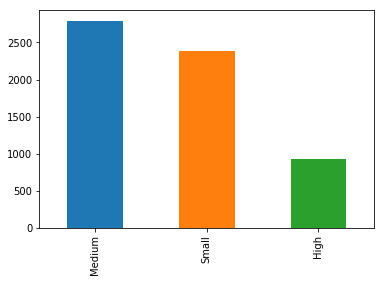

In [109]:
train['Outlet_Size'].value_counts().plot.bar()

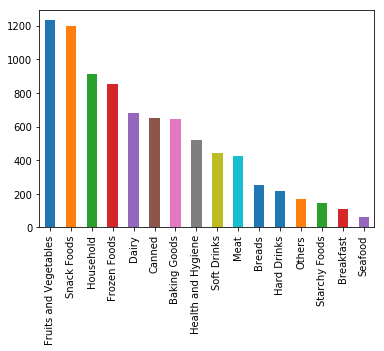

In [110]:
train['Item_Type'].value_counts().plot.bar()

In [111]:
categorical

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical:
    train[i]=le.fit_transform(train[i])

TypeError: '<' not supported between instances of 'str' and 'float'

In [112]:
a=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
a

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [113]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in a:
    train[i]=le.fit_transform(train[i])
train.head()



TypeError: '<' not supported between instances of 'str' and 'float'

In [114]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [115]:
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
#train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [116]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [117]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical:
    train[i]=le.fit_transform(train[i])
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.066132,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.066132,9,53.8614,1,1987,0,2,1,994.7052


In [118]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [119]:
x=train.drop(['Item_Outlet_Sales'],axis='columns')

In [120]:
y=train['Item_Outlet_Sales']

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [122]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [123]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [127]:
y_pred=reg.predict(x_test)

In [128]:
reg.score(x_test,y_test)

0.5162837994887497

In [129]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_pred)

In [130]:
mae

903.5731983102453

In [60]:
train1=train.drop(['Item_Visibility'],axis='columns')


In [74]:
x1=train1.drop(['Item_Outlet_Sales','Item_Identifier'],axis='columns')
y1=train1['Item_Outlet_Sales']

In [75]:
reg.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
reg.predict(x1_test)

array([3493.40744943, 4112.21933586, 3866.35601022, ..., 2009.87209278,
       2721.23952663, 1054.40852009])

In [77]:
reg.score(x1_test,y1_test)

0.5034815309825411

In [78]:
x1

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300000,0,4,249.8092,9,1999,1,0,1
1,5.920000,1,14,48.2692,3,2009,1,2,2
2,17.500000,0,10,141.6180,9,1999,1,0,1
3,19.200000,1,6,182.0950,0,1998,1,2,0
4,8.930000,0,9,53.8614,1,1987,0,2,1
5,10.395000,1,0,51.4008,3,2009,1,2,2
6,13.650000,1,13,57.6588,1,1987,0,2,1
7,12.857645,0,13,107.7622,5,1985,1,2,3
8,16.200000,1,5,96.9726,7,2002,1,1,1
9,19.200000,1,5,187.8214,2,2007,1,1,1
